In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os, gc
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 200)
pd.set_option('display.max.columns', 200)


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', 
        font_scale=2, color_codes=True, rc=None)

In [2]:
os.listdir('data/')

['__MACOSX', 'sample_submission.csv', 'data.csv']

In [3]:
df = pd.read_csv('data/data.csv')
df.head()

Unnamed: 0  match_event_id  location_x  location_y  remaining_min  \
0           0            10.0       167.0        72.0           10.0   
1           1            12.0      -157.0         0.0           10.0   
2           2            35.0      -101.0       135.0            7.0   
3           3            43.0       138.0       175.0            6.0   
4           4           155.0         0.0         0.0            NaN   

   power_of_shot  knockout_match game_season  remaining_sec  distance_of_shot  \
0            1.0             0.0     2000-01           27.0              38.0   
1            1.0             0.0     2000-01           22.0              35.0   
2            1.0             0.0     2000-01           45.0              36.0   
3            1.0             0.0     2000-01           52.0              42.0   
4            2.0             0.0     2000-01           19.0              20.0   

   is_goal           area_of_shot shot_basics    range_of_shot  \
0      NaN          Right Side(R)   Mid Range        16-24 ft.   
1      0.0           Left Side(L)   Mid Range         8-16 ft.   
2      1.0   Left Side Center(LC)   Mid Range        16-24 ft.   
3      0.0  Right Side Center(RC)   Mid Range        16-24 ft.   
4      1.0              Center(C)   Goal Area  Less Than 8 ft.   

           team_name date_of_game   home/away  shot_id_number  \
0  Manchester United   2000-10-31  MANU @ POR             1.0   
1  Manchester United   2000-10-31  MANU @ POR             2.0   
2  Manchester United   2000-10-31         NaN             3.0   
3  Manchester United   2000-10-31  MANU @ POR             4.0   
4                NaN   2000-10-31  MANU @ POR             5.0   

                  lat/lng type_of_shot type_of_combined_shot  match_id  \
0  45.539131, -122.651648    shot - 30                   NaN  20000012   
1  45.539131, -122.651648    shot - 45                   NaN  20000012   
2  45.539131, -122.651648    shot - 25                   NaN  20000012   
3  45.539131, -122.651648          NaN              shot - 3  20000012   
4  45.539131, -122.651648          NaN              shot - 1  20000012   

      team_id  remaining_min.1  power_of_shot.1  knockout_match.1  \
0  1610612747            10.00              1.0            50.608   
1  1610612747            10.00              1.0            28.800   
2  1610612747            92.64              1.0             0.000   
3  1610612747              NaN              1.0           122.608   
4  1610612747            42.64              2.0             0.000   

   remaining_sec.1  distance_of_shot.1  
0          54.2000                38.0  
1          22.0000                35.0  
2          63.7216                54.4  
3          52.0000                42.0  
4          19.0000                20.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 28 columns):
Unnamed: 0               30697 non-null int64
match_event_id           29134 non-null float64
location_x               29236 non-null float64
location_y               29157 non-null float64
remaining_min            29135 non-null float64
power_of_shot            29211 non-null float64
knockout_match           29180 non-null float64
game_season              24835 non-null object
remaining_sec            29103 non-null float64
distance_of_shot         29130 non-null float64
is_goal                  24429 non-null float64
area_of_shot             29195 non-null object
shot_basics              29122 non-null object
range_of_shot            29133 non-null object
team_name                29162 non-null object
date_of_game             29147 non-null object
home/away                29200 non-null object
shot_id_number           29134 non-null float64
lat/lng                  29132 non-n

In [5]:
df.columns

Index(['Unnamed: 0', 'match_event_id', 'location_x', 'location_y',
       'remaining_min', 'power_of_shot', 'knockout_match', 'game_season',
       'remaining_sec', 'distance_of_shot', 'is_goal', 'area_of_shot',
       'shot_basics', 'range_of_shot', 'team_name', 'date_of_game',
       'home/away', 'shot_id_number', 'lat/lng', 'type_of_shot',
       'type_of_combined_shot', 'match_id', 'team_id', 'remaining_min.1',
       'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1',
       'distance_of_shot.1'],
      dtype='object')

In [8]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.shape

(30697, 27)

In [14]:
train_df = df[~df.is_goal.isnull()]
test_df  = df[df.is_goal.isnull()]
train_df.shape, test_df.shape

((24429, 27), (6268, 27))

# SCORE: 1 / (1 + MAE)     .......  ##MAE: mean absolute error

## There seem to be duplicate columns, but turns out that these are uncorrelated component, which i guess, represent the first and second lap data, which make sense.

In [19]:
df[[ 'remaining_min.1',
     'power_of_shot.1',
     'knockout_match.1',
     'remaining_sec.1',
     'distance_of_shot.1',
     'remaining_min',
     'power_of_shot',
     'knockout_match',
     'remaining_sec',
     'distance_of_shot',]].head()

remaining_min.1  power_of_shot.1  knockout_match.1  remaining_sec.1  \
0            10.00              1.0            50.608          54.2000   
1            10.00              1.0            28.800          22.0000   
2            92.64              1.0             0.000          63.7216   
3              NaN              1.0           122.608          52.0000   
4            42.64              2.0             0.000          19.0000   

   distance_of_shot.1  remaining_min  power_of_shot  knockout_match  \
0                38.0           10.0            1.0             0.0   
1                35.0           10.0            1.0             0.0   
2                54.4            7.0            1.0             0.0   
3                42.0            6.0            1.0             0.0   
4                20.0            NaN            2.0             0.0   

   remaining_sec  distance_of_shot  
0           27.0              38.0  
1           22.0              35.0  
2           45.0              36.0  
3           52.0              42.0  
4           19.0              20.0

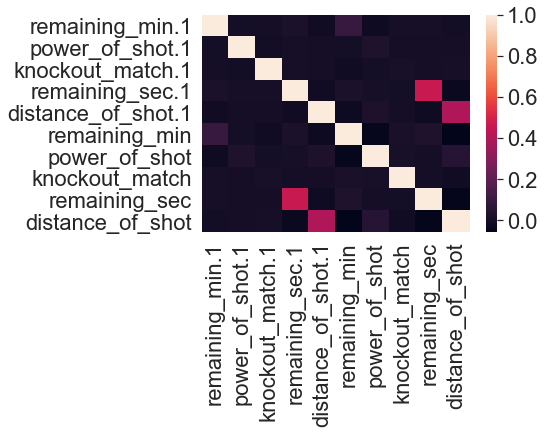

In [18]:
# calculate the correlation matrix
corr = df[[ 'remaining_min.1',
     'power_of_shot.1',
     'knockout_match.1',
     'remaining_sec.1',
     'distance_of_shot.1',
     'remaining_min',
     'power_of_shot',
     'knockout_match',
     'remaining_sec',
     'distance_of_shot',]].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [20]:
[col for col in df.columns]

['match_event_id',
 'location_x',
 'location_y',
 'remaining_min',
 'power_of_shot',
 'knockout_match',
 'game_season',
 'remaining_sec',
 'distance_of_shot',
 'is_goal',
 'area_of_shot',
 'shot_basics',
 'range_of_shot',
 'team_name',
 'date_of_game',
 'home/away',
 'shot_id_number',
 'lat/lng',
 'type_of_shot',
 'type_of_combined_shot',
 'match_id',
 'team_id',
 'remaining_min.1',
 'power_of_shot.1',
 'knockout_match.1',
 'remaining_sec.1',
 'distance_of_shot.1']

In [21]:
df.head()

match_event_id  location_x  location_y  remaining_min  power_of_shot  \
0            10.0       167.0        72.0           10.0            1.0   
1            12.0      -157.0         0.0           10.0            1.0   
2            35.0      -101.0       135.0            7.0            1.0   
3            43.0       138.0       175.0            6.0            1.0   
4           155.0         0.0         0.0            NaN            2.0   

   knockout_match game_season  remaining_sec  distance_of_shot  is_goal  \
0             0.0     2000-01           27.0              38.0      NaN   
1             0.0     2000-01           22.0              35.0      0.0   
2             0.0     2000-01           45.0              36.0      1.0   
3             0.0     2000-01           52.0              42.0      0.0   
4             0.0     2000-01           19.0              20.0      1.0   

            area_of_shot shot_basics    range_of_shot          team_name  \
0          Right Side(R)   Mid Range        16-24 ft.  Manchester United   
1           Left Side(L)   Mid Range         8-16 ft.  Manchester United   
2   Left Side Center(LC)   Mid Range        16-24 ft.  Manchester United   
3  Right Side Center(RC)   Mid Range        16-24 ft.  Manchester United   
4              Center(C)   Goal Area  Less Than 8 ft.                NaN   

  date_of_game   home/away  shot_id_number                 lat/lng  \
0   2000-10-31  MANU @ POR             1.0  45.539131, -122.651648   
1   2000-10-31  MANU @ POR             2.0  45.539131, -122.651648   
2   2000-10-31         NaN             3.0  45.539131, -122.651648   
3   2000-10-31  MANU @ POR             4.0  45.539131, -122.651648   
4   2000-10-31  MANU @ POR             5.0  45.539131, -122.651648   

  type_of_shot type_of_combined_shot  match_id     team_id  remaining_min.1  \
0    shot - 30                   NaN  20000012  1610612747            10.00   
1    shot - 45                   NaN  20000012  1610612747            10.00   
2    shot - 25                   NaN  20000012  1610612747            92.64   
3          NaN              shot - 3  20000012  1610612747              NaN   
4          NaN              shot - 1  20000012  1610612747            42.64   

   power_of_shot.1  knockout_match.1  remaining_sec.1  distance_of_shot.1  
0              1.0            50.608          54.2000                38.0  
1              1.0            28.800          22.0000                35.0  
2              1.0             0.000          63.7216                54.4  
3              1.0           122.608          52.0000                42.0  
4              2.0             0.000          19.0000                20.0

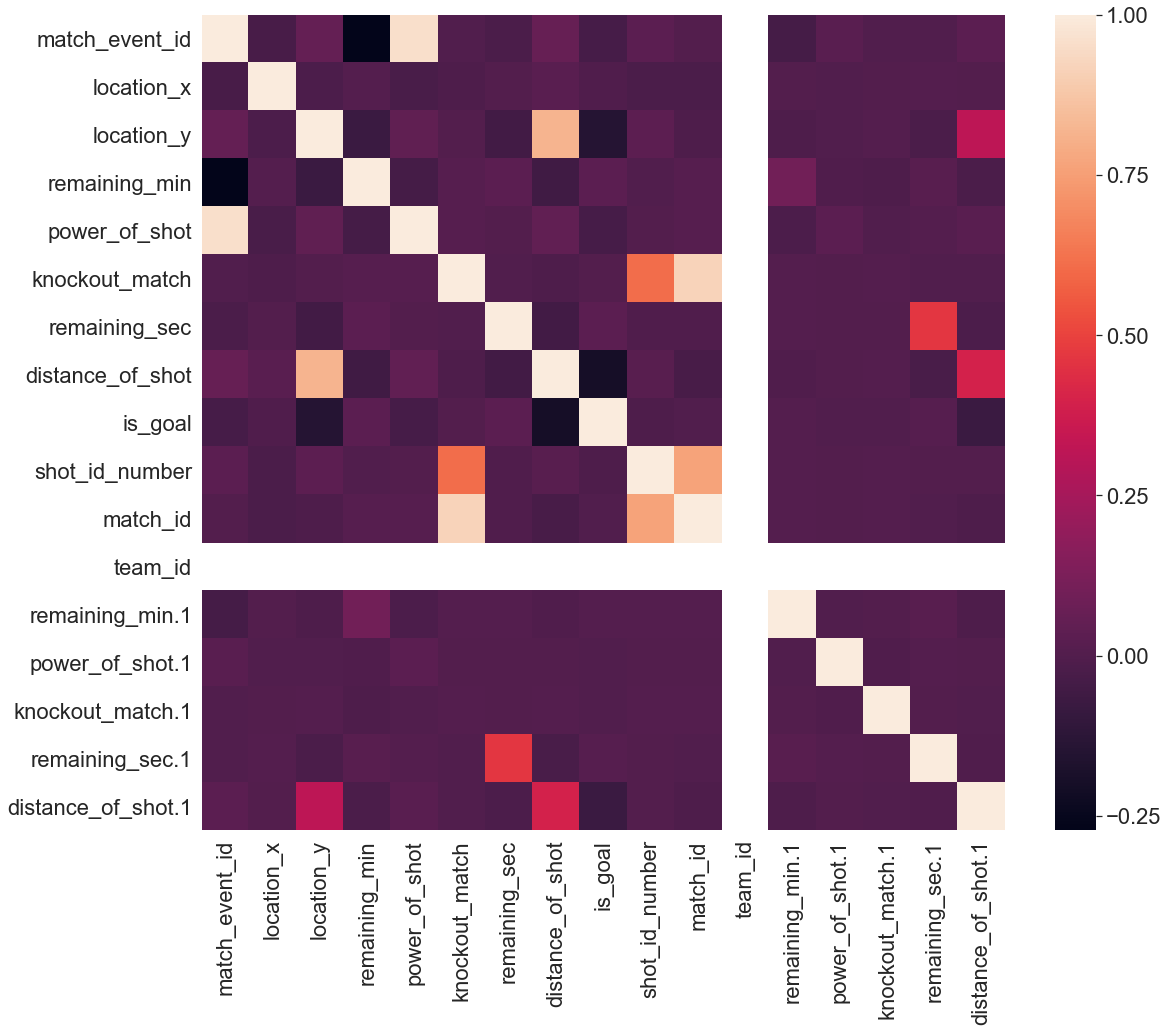

In [28]:
# calculate the correlation matrix
corr = df.corr()
fig, ax = plt.subplots(figsize=(18,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, ax=ax)

In [35]:
for col in df.columns:
    print(col.ljust(22), df[col].unique().shape[0])

match_event_id         619
location_x             489
location_y             451
remaining_min          13
power_of_shot          8
knockout_match         3
game_season            21
remaining_sec          61
distance_of_shot       74
is_goal                3
area_of_shot           7
shot_basics            8
range_of_shot          6
team_name              2
date_of_game           1559
home/away              75
shot_id_number         29135
lat/lng                39
type_of_shot           58
type_of_combined_shot  7
match_id               1559
team_id                1
remaining_min.1        292
power_of_shot.1        207
knockout_match.1       383
remaining_sec.1        355
distance_of_shot.1     272


In [39]:
df.apply(lambda x: x.value_counts().shape[0])

match_event_id             618
location_x                 488
location_y                 450
remaining_min               12
power_of_shot                7
knockout_match               2
game_season                 20
remaining_sec               60
distance_of_shot            73
is_goal                      2
area_of_shot                 6
shot_basics                  7
range_of_shot                5
team_name                    1
date_of_game              1558
home/away                   74
shot_id_number           29134
lat/lng                     38
type_of_shot                57
type_of_combined_shot        6
match_id                  1559
team_id                      1
remaining_min.1            291
power_of_shot.1            206
knockout_match.1           382
remaining_sec.1            354
distance_of_shot.1         271
dtype: int64

In [42]:
df.drop(['team_name','team_id', 'shot_id_number'], axis=1, inplace=True)
df.shape

(30697, 24)

In [43]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-linux64) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-linux64) (build 25.121-b15, mixed mode)
  Starting server from /home/ankish/anaconda3/h2o_jar/h2o.jar
  Ice root: /tmp/tmpfz4medlz
  JVM stdout: /tmp/tmpfz4medlz/h2o_ankish_started_from_python.out
  JVM stderr: /tmp/tmpfz4medlz/h2o_ankish_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         02 secs
H2O cluster timezone:       Asia/Kolkata
H2O data parsing timezone:  UTC
H2O cluster version:        3.18.0.2
H2O cluster version age:    1 year, 4 months and 13 days !!!
H2O cluster name:           H2O_from_python_ankish_267tg8
H2O cluster total nodes:    1
H2O cluster free memory:    2.590 Gb
H2O cluster total cores:    4
H2O cluster allowed cores:  4
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.6.8 final
--------------------------  ----------------------------------------

In [45]:
del train_df, test_df
gc.collect()

2746

In [46]:
train_df = df[~df.is_goal.isnull()]
test_df  = df[df.is_goal.isnull()]
train_df.shape, test_df.shape

((24429, 24), (6268, 24))

In [47]:
train = h2o.H2OFrame(train_df)
test  = h2o.H2OFrame(test_df)
train.shape, test.shape

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


((24429, 24), (6268, 24))

In [48]:
# Identify predictors and response
x = train.columns
y = "is_goal"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y]  = test[y].asfactor()

In [56]:

# Run AutoML for 30 seconds
aml = H2OAutoML(max_models=25, seed=1337, max_runtime_secs=9500, nfolds=4)
aml.train(x = x, y = y,
          training_frame = train,
          leaderboard_frame = train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [57]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id auc logloss 
 
 
 GBM_grid_0_AutoML_20190719_192410_model_9 0.974594 0.233703 
 GBM_grid_0_AutoML_20190719_192410_model_16 0.967886 0.671416 
 DRF_0_AutoML_20190719_192130 0.967523 0.339231 
 DRF_0_AutoML_20190719_192410 0.966501 0.340454 
 GBM_grid_0_AutoML_20190719_192130_model_11 0.961908 0.679283 
 GBM_grid_0_AutoML_20190719_192130_model_9 0.959949 0.676184 
 GBM_grid_0_AutoML_20190719_192410_model_14 0.959949 0.676184 
 GBM_grid_0_AutoML_20190719_192410_model_19 0.948774 0.296676 
 GBM_grid_0_AutoML_20190719_192410_model_18 0.943755 0.296538 
 GBM_grid_0_AutoML_20190719_192130_model_10 0.917779 0.382282 
 GBM_grid_0_AutoML_20190719_192410_model_15 0.917779 0.382282 
 XRT_0_AutoML_20190719_192130 0.915627 0.467867 
 XRT_0_AutoML_20190719_192410 0.913938 0.468308 
 StackedEnsemble_BestOfFamily_0_AutoML_20190719_192130 0.898532 0.5262 
 GBM_grid_0_AutoML_20190719_192410_model_3 0.897058 0.483937 
 GBM_grid_0_AutoML_20190719_192130_model_3 0.897058 0.483937 
 GBM_grid_0_AutoML_20190719_192410_model_2 0.840317 0.536551 
 GBM_grid_0_AutoML_20190719_192130_model_2 0.836616 0.539839 
 GBM_grid_0_AutoML_20190719_192410_model_12 0.832726 0.645242 
 GBM_grid_0_AutoML_20190719_192130_model_7 0.832498 0.645912 
 GBM_grid_0_AutoML_20190719_192410_model_17 0.829264 0.507352 
 StackedEnsemble_AllModels_0_AutoML_20190719_192130 0.824344 0.569739 
 GBM_grid_0_AutoML_20190719_192410_model_20 0.821176 0.54825 
 GBM_grid_0_AutoML_20190719_192410_model_7 0.81368 0.634597 
 GBM_grid_0_AutoML_20190719_192410_model_1 0.804576 0.561384 
 GBM_grid_0_AutoML_20190719_192410_model_4 0.80169 0.563807 
 GBM_grid_0_AutoML_20190719_192130_model_4 0.80169 0.563807 
 GBM_grid_0_AutoML_20190719_192130_model_1 0.800057 0.564462 
 GBM_grid_0_AutoML_20190719_192410_model_8 0.784732 0.550953 
 GBM_grid_0_AutoML_20190719_192130_model_5 0.784107 0.582048 
 GBM_grid_0_AutoML_20190719_192410_model_10 0.784107 0.582048 
 GBM_grid_0_AutoML_20190719_192130_model_0 0.770886 0.581386 
 GBM_grid_0_AutoML_20190719_192410_model_0 0.770886 0.581386 
 GBM_grid_0_AutoML_20190719_192130_model_8 0.721296 0.683184 
 GBM_grid_0_AutoML_20190719_192410_model_13 0.721296 0.683184 
 GBM_grid_0_AutoML_20190719_192410_model_6 0.720693 0.652671 
 GBM_grid_0_AutoML_20190719_192410_model_5 0.714648 0.614305 
 DeepLearning_0_AutoML_20190719_192130 0.666337 0.634286 
 DeepLearning_0_AutoML_20190719_192410 0.662936 0.639808 
 GLM_grid_0_AutoML_20190719_192410_model_0 0.655312 0.641068 
 GBM_grid_0_AutoML_20190719_192410_model_11 0.654422 0.669277 
 GBM_grid_0_AutoML_20190719_192130_model_6 0.654422 0.669277 
 GLM_grid_0_AutoML_20190719_192130_model_0 0.654207 0.641709

In [54]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id auc logloss 
 
 
 DRF_0_AutoML_20190719_192130 0.967523 0.339231 
 GBM_grid_0_AutoML_20190719_192130_model_11 0.961908 0.679283 
 GBM_grid_0_AutoML_20190719_192130_model_9 0.959949 0.676184 
 GBM_grid_0_AutoML_20190719_192130_model_10 0.917779 0.382282 
 XRT_0_AutoML_20190719_192130 0.915627 0.467867 
 StackedEnsemble_BestOfFamily_0_AutoML_20190719_192130 0.898532 0.5262 
 GBM_grid_0_AutoML_20190719_192130_model_3 0.897058 0.483937 
 GBM_grid_0_AutoML_20190719_192130_model_2 0.836616 0.539839 
 GBM_grid_0_AutoML_20190719_192130_model_7 0.832498 0.645912 
 StackedEnsemble_AllModels_0_AutoML_20190719_192130 0.824344 0.569739 
 GBM_grid_0_AutoML_20190719_192130_model_4 0.80169 0.563807 
 GBM_grid_0_AutoML_20190719_192130_model_1 0.800057 0.564462 
 GBM_grid_0_AutoML_20190719_192130_model_5 0.784107 0.582048 
 GBM_grid_0_AutoML_20190719_192130_model_0 0.770886 0.581386 
 GBM_grid_0_AutoML_20190719_192130_model_8 0.721296 0.683184 
 DeepLearning_0_AutoML_20190719_192130 0.666337 0.634286 
 GBM_grid_0_AutoML_20190719_192130_model_6 0.654422 0.669277 
 GLM_grid_0_AutoML_20190719_192130_model_0 0.654207 0.641709

In [55]:
3600*2.5

9000.0

In [58]:
# Run AutoML for 30 seconds
aml = H2OAutoML(max_models=50, seed=1337, max_runtime_secs=9500, nfolds=5)
aml.train(x = x, y = y,
          training_frame = train,
          leaderboard_frame = train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [59]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id auc logloss 
 
 
 GBM_grid_0_AutoML_20190719_192410_model_9 0.974594 0.233703 
 GBM_grid_0_AutoML_20190719_192410_model_16 0.967886 0.671416 
 DRF_0_AutoML_20190719_192130 0.967523 0.339231 
 DRF_0_AutoML_20190719_192410 0.966501 0.340454 
 DRF_0_AutoML_20190719_192718 0.964921 0.34095 
 GBM_grid_0_AutoML_20190719_192130_model_11 0.961908 0.679283 
 GBM_grid_0_AutoML_20190719_192130_model_9 0.959949 0.676184 
 GBM_grid_0_AutoML_20190719_192410_model_14 0.959949 0.676184 
 GBM_grid_0_AutoML_20190719_192410_model_19 0.948774 0.296676 
 GBM_grid_0_AutoML_20190719_192410_model_18 0.943755 0.296538 
 GBM_grid_0_AutoML_20190719_192718_model_6 0.939217 0.449615 
 GBM_grid_0_AutoML_20190719_192130_model_10 0.917779 0.382282 
 GBM_grid_0_AutoML_20190719_192410_model_15 0.917779 0.382282 
 XRT_0_AutoML_20190719_192130 0.915627 0.467867 
 XRT_0_AutoML_20190719_192718 0.915627 0.467867 
 XRT_0_AutoML_20190719_192410 0.913938 0.468308 
 DeepLearning_grid_0_AutoML_20190719_192718_model_5 0.913038 0.544474 
 DeepLearning_grid_0_AutoML_20190719_192718_model_3 0.906246 0.474241 
 DeepLearning_grid_0_AutoML_20190719_192718_model_7 0.899986 0.448914 
 GBM_grid_0_AutoML_20190719_192718_model_3 0.899129 0.480321 
 StackedEnsemble_BestOfFamily_0_AutoML_20190719_192130 0.898532 0.5262 
 DeepLearning_grid_0_AutoML_20190719_192718_model_18 0.897591 0.445395 
 GBM_grid_0_AutoML_20190719_192410_model_3 0.897058 0.483937 
 GBM_grid_0_AutoML_20190719_192130_model_3 0.897058 0.483937 
 DeepLearning_grid_0_AutoML_20190719_192718_model_16 0.886929 0.457408 
 DeepLearning_grid_0_AutoML_20190719_192718_model_20 0.878527 0.516961 
 DeepLearning_grid_0_AutoML_20190719_192718_model_9 0.877509 0.485738 
 DeepLearning_grid_0_AutoML_20190719_192718_model_0 0.874214 0.457046 
 DeepLearning_grid_0_AutoML_20190719_192718_model_15 0.865331 0.47333 
 DeepLearning_grid_0_AutoML_20190719_192718_model_23 0.860835 0.536544 
 GBM_grid_0_AutoML_20190719_192718_model_2 0.842179 0.534907 
 GBM_grid_0_AutoML_20190719_192410_model_2 0.840317 0.536551 
 DeepLearning_grid_0_AutoML_20190719_192718_model_14 0.837621 0.50313 
 GBM_grid_0_AutoML_20190719_192130_model_2 0.836616 0.539839 
 DeepLearning_grid_0_AutoML_20190719_192718_model_6 0.83318 0.511891 
 GBM_grid_0_AutoML_20190719_192410_model_12 0.832726 0.645242 
 GBM_grid_0_AutoML_20190719_192130_model_7 0.832498 0.645912 
 GBM_grid_0_AutoML_20190719_192410_model_17 0.829264 0.507352 
 DeepLearning_grid_0_AutoML_20190719_192718_model_12 0.827188 0.533155 
 StackedEnsemble_AllModels_0_AutoML_20190719_192130 0.824344 0.569739 
 GBM_grid_0_AutoML_20190719_192410_model_20 0.821176 0.54825 
 DeepLearning_grid_0_AutoML_20190719_192718_model_27 0.818813 0.524196 
 DeepLearning_grid_0_AutoML_20190719_192718_model_10 0.813859 0.524651 
 GBM_grid_0_AutoML_20190719_192410_model_7 0.81368 0.634597 
 DeepLearning_grid_0_AutoML_20190719_192718_model_17 0.808576 0.533416 
 DeepLearning_grid_0_AutoML_20190719_192718_model_1 0.806066 0.530595 
 GBM_grid_0_AutoML_20190719_192410_model_1 0.804576 0.561384 
 DeepLearning_grid_0_AutoML_20190719_192718_model_13 0.803429 0.545421 
 GBM_grid_0_AutoML_20190719_192718_model_1 0.802155 0.563005 
 DeepLearning_grid_0_AutoML_20190719_192718_model_11 0.80206 0.537692 
 GBM_grid_0_AutoML_20190719_192718_model_4 0.80169 0.563807 
 GBM_grid_0_AutoML_20190719_192410_model_4 0.80169 0.563807 
 GBM_grid_0_AutoML_20190719_192130_model_4 0.80169 0.563807 
 GBM_grid_0_AutoML_20190719_192130_model_1 0.800057 0.564462 
 DeepLearning_grid_0_AutoML_20190719_192718_model_4 0.795324 0.547531 
 GBM_grid_0_AutoML_20190719_192718_model_5 0.790305 0.618866 
 DeepLearning_grid_0_AutoML_20190719_192718_model_26 0.785835 0.588766 
 GBM_grid_0_AutoML_20190719_192410_model_8 0.784732 0.550953 
 GBM_grid_0_AutoML_20190719_192130_model_5 0.784107 0.582048 
 GBM_grid_0_AutoML_20190719_192410_model_10 0.784107 0.582048 
 GBM_grid_0_AutoML_20190719_192718_model_0 0.777596 0.577355 
 DeepLearning_grid_0_AutoML_20190719_192718_mode

In [67]:
aml.predict(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: | (failed)


OSError: Job with key $03017f00000132d4ffffffff$_b21fd5f3ffab160c70129034173e4fc8 failed with an exception: java.lang.IllegalArgumentException: Test/Validation dataset has a categorical response column 'is_goal' with no levels in common with the model
stacktrace: 
java.lang.IllegalArgumentException: Test/Validation dataset has a categorical response column 'is_goal' with no levels in common with the model
	at hex.Model.adaptTestForTrain(Model.java:1088)
	at hex.Model.adaptTestForTrain(Model.java:963)
	at hex.Model.score(Model.java:1205)
	at water.api.ModelMetricsHandler$1.compute2(ModelMetricsHandler.java:362)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1263)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:974)
	at jsr166y.ForkJoinPool.runWorker(ForkJoinPool.java:1477)
	at jsr166y.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:104)


In [68]:
h2o.shutdown()

[WARNING] in <ipython-input-68-1edf85295eae> line 1:
    >>> h2o.shutdown()
        ^^^^ Deprecated, use ``h2o.cluster().shutdown()``.
H2O session _sid_896a closed.
